## 웹 크롤링 심화
>  
- 사이트 : http://www.mcdonalds.co.kr/www/kor/findus/district.do
- 맥도날드 사이트에서 서울 지역의 매장검색
- 서울시 지도에 매장 분포도 작성
- 맥도널드는 어디에 가장 많은 매장을 가지고 있을까??

In [1]:
from itertools import count
from tqdm import tqdm_notebook
from time import sleep
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd

In [2]:
html = 'http://www.mcdonalds.co.kr/www/kor/findus/district.do?pageIndex={page}&sSearch_yn=Y&skey=2&skey1=&skey2=&skeyword=%EC%84%9C%EC%9A%B8&skey4=&skey5=&skeyword2=&sflag1=&sflag2=&sflag3=&sflag4=&sflag5=&sflag6=&sflag=N'

response = urlopen(html.format(page=1))

soup = BeautifulSoup(response, "lxml")
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="소시지맥머핀, 듀엣세트, 맥도날드듀엣세트, 소세지맥머핀, 맥머핀, 에그맥머핀, 베이컨에그맥머핀, 소시지에그맥머핀, 아침배달음식, 브런치배달, 아침밥배달, 아침식사, 주말아침, 주말아침식사, 맥모닝, 맥딜리버리, 간단한아침식사, 간단한아침식사배달, 아침도시락배달, 아침배달, 아침식사배달, 아침식사배달업체, 주말간단한아침메뉴, 주말아침배달, 주말아침식사배달, 브런치메뉴, 브런치추천, 아침, 아침식사메뉴, 아침메뉴, 간단한아침메뉴, 아침대용식, 빅브렉퍼스트" name="description"/>
<title>지역별 - McDonald's</title>
<link href="/www/common/images/favicon.ico" rel="shortcut icon"/>
<link href="../../common/css/normalize.css" rel="stylesheet" type="text/css"/>
<link href="../../common/css/common.css" rel="stylesheet" type="text/css"/>
<link href="../../common/css/sub.css" rel="stylesheet" type="text/css"/>
<script src="../../common/js_ui/lib/jquery-1.10.2.min.js" type="text/javascript"></script>
<script src="../../common/js_ui/lib/jquery.textPlaceholder.js" type="text/javascript"></script>
<script src="../../common/js_ui/lib/html5shiv-printshiv.js" type="text/javas

In [5]:
tmp = soup.find_all('dl',class_ = 'clearFix')
tmp

[<dl class="clearFix">
 <dt><a href="javascript:moveMap('37.494879','127.130762');"> <img alt="A" src="../../common/images/kor/findus/1.gif"/> 가락DT점</a></dt>
 <dd>070-7017-0622
                                                         , 070-7017-0613
                                                         
                                                     </dd>
 <dd>서울특별시 송파구 가락동 193-7</dd>
 <!-- 도로명 검색주소 노출 -->
 <dd class="road">[도로명주소]서울특별시 송파구 동남로 196 (가락동)</dd>
 <dd class="infoCheck">
 <table border="0" cellpadding="5" cellspacing="5">
 <colgroup>
 <col style="width:70px"/>
 <col style="width:65.8px"/>
 <!-- <col style="width:65.8px" /> -->
 <col style="width:75.1px"/>
 <col style="width:102px"/>
 <col style="width:87px"/>
 <col style="width:72px"/>
 </colgroup>
 <tbody>
 <tr>
 <td>
 																		
 																			
 																			
 																			
 																			07:00~01:00
 																			
 																			
 																			
 																			


In [6]:
len(tmp)

5

In [7]:
tmp2 = tmp[0].get_text()
tmp2

'\n  가락DT점\n070-7017-0622\r\n                                                        , 070-7017-0613\r\n                                                        \r\n                                                    \n서울특별시 송파구 가락동 193-7\n\n[도로명주소]서울특별시 송파구 동남로 196 (가락동)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t07:00~01:00\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t

In [8]:
tmp3 = tmp2.split('\n')
tmp3

['',
 '  가락DT점',
 '070-7017-0622\r',
 '                                                        , 070-7017-0613\r',
 '                                                        \r',
 '                                                    ',
 '서울특별시 송파구 가락동 193-7',
 '',
 '[도로명주소]서울특별시 송파구 동남로 196 (가락동)',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t07:00~01:00\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r',
 '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\

In [9]:
tmp3[1], tmp3[6], tmp3[8]

('  가락DT점', '서울특별시 송파구 가락동 193-7', '[도로명주소]서울특별시 송파구 동남로 196 (가락동)')

In [12]:
tmp3[1].strip()

'가락DT점'

In [13]:
tmp = soup.find_all('dl',class_ = 'clearFix')
tmp

[<dl class="clearFix">
 <dt><a href="javascript:moveMap('37.494879','127.130762');"> <img alt="A" src="../../common/images/kor/findus/1.gif"/> 가락DT점</a></dt>
 <dd>070-7017-0622
                                                         , 070-7017-0613
                                                         
                                                     </dd>
 <dd>서울특별시 송파구 가락동 193-7</dd>
 <!-- 도로명 검색주소 노출 -->
 <dd class="road">[도로명주소]서울특별시 송파구 동남로 196 (가락동)</dd>
 <dd class="infoCheck">
 <table border="0" cellpadding="5" cellspacing="5">
 <colgroup>
 <col style="width:70px"/>
 <col style="width:65.8px"/>
 <!-- <col style="width:65.8px" /> -->
 <col style="width:75.1px"/>
 <col style="width:102px"/>
 <col style="width:87px"/>
 <col style="width:72px"/>
 </colgroup>
 <tbody>
 <tr>
 <td>
 																		
 																			
 																			
 																			
 																			07:00~01:00
 																			
 																			
 																			
 																			


In [14]:
if len(tmp) is 0:
    print('Nothing')

In [15]:
for pg in tqdm_notebook(count()):
    if pg==50:
        print(pg, '^^'); sleep(1)
        print('Wow, I got out of the loop !!')
        break
    sleep(1/10); print(pg, end='...')

0...1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50 ^^
Wow, I got out of the loop !!



In [16]:
nameMCD = []
addMCDolder = []
addMCDnewer = []

html = 'http://www.mcdonalds.co.kr/www/kor/findus/district.do?pageIndex={page}&sSearch_yn=Y&skey=2&skey1=&skey2=&skeyword=%EC%84%9C%EC%9A%B8&skey4=&skey5=&skeyword2=&sflag1=&sflag2=&sflag3=&sflag4=&sflag5=&sflag6=&sflag=N'

for pg in tqdm_notebook(count()): # len(tmp) 값이 0이 되면 for문 멈춤
    page = pg+1
    response = urlopen(html.format(page=page))
    soup = BeautifulSoup(response, "lxml")
    tmp = soup.find_all('dl','clearFix')
    
    if len(tmp) is 0:
        print('crawling is finished !!')
        break
    
    for lenTmp in range(len(tmp)):
        tmp2 = tmp[lenTmp].get_text()
        tmp3 = tmp2.split('\n')
    
        nameMCD.append(tmp3[1].replace(' ', ''))
        addMCDolder.append(tmp3[6])
        addMCDnewer.append(tmp3[8])

    sleep(1/10); 
    print('crawling...%d' % page)

crawling...1
crawling...2
crawling...3
crawling...4
crawling...5
crawling...6
crawling...7
crawling...8
crawling...9
crawling...10
crawling...11
crawling...12
crawling...13
crawling...14
crawling...15
crawling...16
crawling...17
crawling...18
crawling...19
crawling...20
crawling...21
crawling is finished !!


In [17]:
len(nameMCD), len(addMCDolder), len(addMCDnewer)

(101, 101, 101)

In [18]:
nameMCD

['가락DT점',
 '가산디지털점',
 '가산비지니스센터점',
 '강남2호점',
 '강남구청점',
 '강남삼성DT',
 '강동구청점',
 '고척DT',
 '공덕점',
 '과학기술대점',
 '구로디지탈',
 '구로애경점',
 '구산점',
 '구의역점',
 '굽은다리역DT',
 '노량진점',
 '대학로점',
 '등촌DT점',
 '마리오아울렛점',
 '망원점',
 '명동2호점',
 '명동점',
 '명지대점',
 '목동점',
 '미아DT점',
 '미아리점',
 '미아역점',
 '방배점',
 '방학역DT점',
 '보라매',
 '삼선교점',
 '삼성역점',
 '상계DT점',
 '상일동점',
 '서울교대점',
 '서울동묘역점',
 '서울둔촌DT',
 '서울번동DT점',
 '서울상암DMC',
 '서울시청점',
 '서울시흥DT점',
 '서울역점',
 '서초GS점',
 '서초뱅뱅점',
 '석촌역점',
 '선릉점',
 '성균관대점',
 '세이브존노원점',
 '송정역점',
 '송파잠실DT점',
 '수유점',
 '숭실대점',
 '신내점',
 '신도림테크노점',
 '신도림디큐브점',
 '신림점',
 '신사역점',
 '신월DT점',
 '신월SKDT점',
 '신천점',
 '쌍문DT점',
 '안국역점',
 '안암점',
 '압구정CGV점',
 '양재SKDT점',
 '양재점',
 '양천구청DT점',
 '양평SK점',
 '어린이대공원점',
 '여의도점',
 '연세대점',
 '연신내점',
 '염창DT점',
 '영등포점',
 '왕십리점',
 '우장산DT',
 '위례신도시점',
 '이마트상봉점',
 '이마트성수점',
 '이마트은평점',
 '이수점',
 '이태원점',
 '잠실역점',
 '장안사거리점',
 '전농점',
 '종로3가점',
 '종암SK점',
 '중계역점',
 '중계점',
 '중랑점',
 '중앙대점',
 '청담DT점',
 '코엑스',
 '파리공원점',
 '학동역',
 '한국외대점',
 '한양대점',
 '한티점',
 '합정메세나폴리스',
 '홍익대점',
 '홍제역점']

In [19]:
addMCDolder

['서울특별시 송파구 가락동 193-7',
 '서울특별시 금천구 가산동 50-3 대륭포스트타워6차 1층',
 '서울특별시 금천구 가산동 371-6 가산비지니스센터',
 '서울특별시 강남구 역삼동 822-2 비전타워 2층',
 '서울특별시 강남구 논현동 242-29',
 '서울특별시 강남구 삼성동 113-7',
 '서울특별시 강동구 성내동 539-2',
 '서울특별시 구로구 고척동 73-20',
 '서울특별시 마포구 도화동 559 마포트라팰리스 1층',
 '서울특별시 노원구 공릉동 435-2',
 '서울특별시 구로구 구로동 197-21 태평양물산 1층',
 '서울특별시 구로구 구로동 573 애경백화점',
 '서울특별시 은평구 구산동 1-14',
 '서울특별시 광진구 자양동 216-11',
 '서울특별시 강동구 천호동 31-10',
 '서울특별시 동작구 노량진1동 100-1',
 '서울특별시 종로구 동숭동 1-34',
 '서울특별시 강서구 등촌동 630',
 '서울특별시\xa0금천구 가산동 60-52 마리오 아울렛 1관',
 '서울 마포구 망원동 377-19',
 '서울특별시 중구 회현동3가 1-5',
 '서울특별시 중구 명동1가 48-2 1층',
 '서울특별시 서대문구 남가좌동 324-3',
 '서울특별시 양천구 신정동 899-6',
 '서울특별시 강북구 미아동 682-12',
 '서울특별시 강북구 미아동 71-5',
 '서울특별시 강북구 미아동 197-5',
 '서울특별시 서초구 방배동 909-9',
 '서울특별시 도봉구 도봉동 620-25',
 '서울특별시 영등포구 신길6동 505',
 '서울특별시 성북구 동소문동1가 32-3',
 '서울특별시 강남구 삼성동 158-15',
 '서울특별시 노원구 상계동 1022',
 '서울특별시 강동구 상일동 502, 502-1',
 '서울특별시 서초구 서초동 1674-5',
 '서울특별시 종로구 창신동 290',
 '서울특별시 강동구 둔촌동 517-2',
 '서울특별시 강북구 번동 106',
 '서울특별시 마포구 상암동 1

In [20]:
addMCDnewer

['[도로명주소]서울특별시 송파구 동남로 196 (가락동)',
 '[도로명주소]서울특별시 금천구 벚꽃로 298 (가산동)',
 '[도로명주소]서울특별시 금천구 가산디지털1로 165 (가산동)',
 '[도로명주소]서울특별시 강남구 테헤란로 107, 2층 (역삼동)',
 '[도로명주소]서울특별시 강남구 선릉로 667 (논현동)',
 '[도로명주소]서울특별시 강남구 봉은사로 432',
 '[도로명주소]서울특별시 강동구 성내로 15 (성내동)',
 '[도로명주소]서울특별시 구로구 경인로 393',
 '[도로명주소]서울특별시 마포구 마포대로 53 (도화동)',
 '[도로명주소]서울특별시 노원구 공릉로 231',
 '[도로명주소]서울특별시 구로구 디지털로31길 12 (구로동)',
 '[도로명주소]서울특별시 구로구 구로중앙로 152 (구로동)',
 '[도로명주소]서울특별시 은평구 연서로 131 (구산동)',
 '[도로명주소]서울특별시 광진구 아차산로 376 (자양동)',
 '[도로명주소]서울특별시 강동구 양재대로 1587',
 '[도로명주소]서울특별시 동작구 노량진로 158 (노량진동)',
 '[도로명주소]서울특별시 종로구 대학로 130 (동숭동)',
 '[도로명주소]서울특별시 강서구 양천로 546 (등촌동)',
 '[도로명주소]서울특별시 금천구 디지털로9길 23 (가산동)',
 '[도로명주소]서울 마포구 월드컵로 81',
 '[도로명주소]서울특별시 중구 퇴계로 116-1 (회현동3가)',
 '[도로명주소]서울특별시 중구 명동7길 8 (명동1가)',
 '[도로명주소]서울특별시 서대문구 거북골로 25 (남가좌동)',
 '[도로명주소]서울특별시 양천구 목동로 221 (신정동)',
 '[도로명주소]서울특별시 강북구 미아동 682-12',
 '[도로명주소]서울특별시 강북구 도봉로 48 (미아동)',
 '[도로명주소]서울특별시 강북구 도봉로 204 (미아동)',
 '[도로명주소]서울특별시 서초구 방배로 81 (방배동)',
 '[도로명주소]서울특별시 도봉구 도봉동 620-25',
 

In [21]:
addMCDolder[0].split()

['서울특별시', '송파구', '가락동', '193-7']

In [22]:
addMCDolder[25].split()

['서울특별시', '강북구', '미아동', '71-5']

In [23]:
addMCDolder[25].split()[1]

'강북구'

In [24]:
guNameMCD = [eachAddress.split()[1] for eachAddress in addMCDolder]
guNameMCD

['송파구',
 '금천구',
 '금천구',
 '강남구',
 '강남구',
 '강남구',
 '강동구',
 '구로구',
 '마포구',
 '노원구',
 '구로구',
 '구로구',
 '은평구',
 '광진구',
 '강동구',
 '동작구',
 '종로구',
 '강서구',
 '금천구',
 '마포구',
 '중구',
 '중구',
 '서대문구',
 '양천구',
 '강북구',
 '강북구',
 '강북구',
 '서초구',
 '도봉구',
 '영등포구',
 '성북구',
 '강남구',
 '노원구',
 '강동구',
 '서초구',
 '종로구',
 '강동구',
 '강북구',
 '마포구',
 '중구',
 '금천구',
 '용산구',
 '서초구',
 '서초구',
 '송파구',
 '강남구',
 '종로구',
 '노원구',
 '강서구',
 '송파구',
 '강북구',
 '동작구',
 '중랑구',
 '구로구',
 '구로구',
 '관악구',
 '강남구',
 '양천구',
 '양천구',
 '송파구',
 '도봉구',
 '종로구',
 '성북구',
 '강남구',
 '서초구',
 '서초구',
 '양천구',
 '영등포구',
 '광진구',
 '영등포구',
 '서대문구',
 '은평구',
 '강서구',
 '영등포구',
 '성동구',
 '강서구',
 '송파구',
 '중랑구',
 '성동구',
 '은평구',
 '동작구',
 '용산구',
 '송파구',
 '동대문구',
 '동대문구',
 '종로구',
 '성북구',
 '노원구',
 '노원구',
 '중랑구',
 '동작구',
 '강남구',
 '강남구',
 '양천구',
 '강남구',
 '동대문구',
 '성동구',
 '강남구',
 '마포구',
 '마포구',
 '서대문구']

In [25]:
dongNameMCD = [eachAddress.split()[2] for eachAddress in addMCDolder]
dongNameMCD

['가락동',
 '가산동',
 '가산동',
 '역삼동',
 '논현동',
 '삼성동',
 '성내동',
 '고척동',
 '도화동',
 '공릉동',
 '구로동',
 '구로동',
 '구산동',
 '자양동',
 '천호동',
 '노량진1동',
 '동숭동',
 '등촌동',
 '가산동',
 '망원동',
 '회현동3가',
 '명동1가',
 '남가좌동',
 '신정동',
 '미아동',
 '미아동',
 '미아동',
 '방배동',
 '도봉동',
 '신길6동',
 '동소문동1가',
 '삼성동',
 '상계동',
 '상일동',
 '서초동',
 '창신동',
 '둔촌동',
 '번동',
 '상암동',
 '을지로1가',
 '시흥동',
 '동자동',
 '서초동',
 '서초동',
 '송파동',
 '역삼동',
 '명륜2가',
 '하계동',
 '공항동',
 '잠실동',
 '번동',
 '상도동',
 '신내동',
 '구로동',
 '신도림동',
 '신림동',
 '신사동',
 '신월동',
 '신월동',
 '잠실동',
 '쌍문동',
 '안국동',
 '안암동5가',
 '신사동',
 '양재동',
 '양재동',
 '신정동',
 '양평동3가',
 '화양동',
 '여의도동',
 '창천동',
 '갈현동',
 '염창동',
 '영등포동3가',
 '행당동',
 '화곡동',
 '장지동',
 '망우동',
 '성수동2가',
 '응암동',
 '사당동',
 '이태원동',
 '신천동',
 '장안동',
 '전농동',
 '종로3가',
 '종암동',
 '상계동',
 '중계동',
 '상봉동',
 '흑석동',
 '청담동',
 '삼성동',
 '목동',
 '논현동',
 '이문동',
 '행당동',
 '대치동',
 '서교동',
 '동교동',
 '홍제동']

In [26]:
resultMCD = pd.DataFrame({'MACDONALD_Store':nameMCD, 
                          '구':guNameMCD, 
                          '동':dongNameMCD, 
                          '주소(지번)':addMCDolder, 
                          '주소(도로)':addMCDnewer})

resultMCD.head(10)

,MACDONALD_Store,구,동,주소(지번),주소(도로)
0,가락DT점,송파구,가락동,서울특별시 송파구 가락동 193-7,[도로명주소]서울특별시 송파구 동남로 196 (가락동)
1,가산디지털점,금천구,가산동,서울특별시 금천구 가산동 50-3 대륭포스트타워6차 1층,[도로명주소]서울특별시 금천구 벚꽃로 298 (가산동)
2,가산비지니스센터점,금천구,가산동,서울특별시 금천구 가산동 371-6 가산비지니스센터,[도로명주소]서울특별시 금천구 가산디지털1로 165 (가산동)
3,강남2호점,강남구,역삼동,서울특별시 강남구 역삼동 822-2 비전타워 2층,"[도로명주소]서울특별시 강남구 테헤란로 107, 2층 (역삼동)"
4,강남구청점,강남구,논현동,서울특별시 강남구 논현동 242-29,[도로명주소]서울특별시 강남구 선릉로 667 (논현동)
5,강남삼성DT,강남구,삼성동,서울특별시 강남구 삼성동 113-7,[도로명주소]서울특별시 강남구 봉은사로 432
6,강동구청점,강동구,성내동,서울특별시 강동구 성내동 539-2,[도로명주소]서울특별시 강동구 성내로 15 (성내동)
7,고척DT,구로구,고척동,서울특별시 구로구 고척동 73-20,[도로명주소]서울특별시 구로구 경인로 393
8,공덕점,마포구,도화동,서울특별시 마포구 도화동 559 마포트라팰리스 1층,[도로명주소]서울특별시 마포구 마포대로 53 (도화동)
9,과학기술대점,노원구,공릉동,서울특별시 노원구 공릉동 435-2,[도로명주소]서울특별시 노원구 공릉로 231


In [27]:
resultMCD['구'].unique()

array(['송파구', '금천구', '강남구', '강동구', '구로구', '마포구', '노원구', '은평구', '광진구',
       '동작구', '종로구', '강서구', '중구', '서대문구', '양천구', '강북구', '서초구', '도봉구',
       '영등포구', '성북구', '용산구', '중랑구', '관악구', '성동구', '동대문구'], dtype=object)

In [28]:
resultMCD['구'].value_counts()

강남구     11
송파구      6
서초구      6
노원구      5
강북구      5
마포구      5
구로구      5
양천구      5
종로구      5
동작구      4
금천구      4
강서구      4
강동구      4
영등포구     4
동대문구     3
중구       3
서대문구     3
은평구      3
중랑구      3
성동구      3
성북구      3
광진구      2
용산구      2
도봉구      2
관악구      1
Name: 구, dtype: int64

In [29]:
tmpCounts = resultMCD['구'].value_counts()
tmpCounts.head()

강남구    11
송파구     6
서초구     6
노원구     5
강북구     5
Name: 구, dtype: int64

In [30]:
tmpCounts.index

Index(['강남구', '송파구', '서초구', '노원구', '강북구', '마포구', '구로구', '양천구', '종로구', '동작구',
       '금천구', '강서구', '강동구', '영등포구', '동대문구', '중구', '서대문구', '은평구', '중랑구', '성동구',
       '성북구', '광진구', '용산구', '도봉구', '관악구'],
      dtype='object')

In [31]:
# population = pd.read_csv('data/seoul_population.csv', sep=',', encoding='utf-8')
population = pd.read_csv('data/seoul_population.csv', sep=',', encoding='euc-kr')
population.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
0,종로구,73879,164348,2.09,26429,16.081121
1,중구,60903,135139,2.07,21655,16.024242
2,용산구,108497,245411,2.12,37238,15.173729
3,성동구,134543,314551,2.28,41752,13.273523
4,광진구,161407,371671,2.21,44470,11.964883


In [32]:
population.set_index('구', inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율
구,,,,,
종로구,73879,164348,2.09,26429,16.081121
중구,60903,135139,2.07,21655,16.024242
용산구,108497,245411,2.12,37238,15.173729
성동구,134543,314551,2.28,41752,13.273523
광진구,161407,371671,2.21,44470,11.964883


In [33]:
tmpCounts

강남구     11
송파구      6
서초구      6
노원구      5
강북구      5
마포구      5
구로구      5
양천구      5
종로구      5
동작구      4
금천구      4
강서구      4
강동구      4
영등포구     4
동대문구     3
중구       3
서대문구     3
은평구      3
중랑구      3
성동구      3
성북구      3
광진구      2
용산구      2
도봉구      2
관악구      1
Name: 구, dtype: int64

In [38]:
# 읽어온 파일에 구별 맥도날드 수 추가
population = pd.concat([population, tmpCounts], axis=1, sort=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,구
강남구,231219,557865,2.39,65859,11.805544,11
강동구,177490,438225,2.45,56983,13.003138,4
강북구,143139,327511,2.26,57002,17.404606,5
강서구,256042,608361,2.35,77381,12.719586,4
관악구,258536,522292,1.95,70807,13.556976,1


In [39]:
population.rename(columns = {'구':'맥도널드'}, inplace=True)

In [40]:
population.head()


,세대,인구수,세대당인구,65세이상고령자,고령비율,맥도널드
강남구,231219,557865,2.39,65859,11.805544,11
강동구,177490,438225,2.45,56983,13.003138,4
강북구,143139,327511,2.26,57002,17.404606,5
강서구,256042,608361,2.35,77381,12.719586,4
관악구,258536,522292,1.95,70807,13.556976,1


In [41]:
population['맥도널드'] / population['인구수'] * 100 * 10000

강남구     19.718032
강동구      9.127731
강북구     15.266663
강서구      6.575043
관악구      1.914638
광진구      5.381103
구로구     11.353418
금천구     15.788809
노원구      8.995993
도봉구      5.796413
동대문구     8.220034
동작구      9.834897
마포구     12.965998
서대문구     9.234435
서초구     13.478179
성동구      9.537404
성북구      6.609356
송파구      8.928651
양천구     10.568881
영등포구     9.901284
용산구      8.149594
은평구      6.119289
종로구     30.423248
중구      22.199365
중랑구      7.289480
dtype: float64

In [42]:
population['맥버거비율'] = population['맥도널드'] / population['인구수'] * 100 * 10000

In [43]:
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,맥도널드,맥버거비율
강남구,231219,557865,2.39,65859,11.805544,11,19.718032
강동구,177490,438225,2.45,56983,13.003138,4,9.127731
강북구,143139,327511,2.26,57002,17.404606,5,15.266663
강서구,256042,608361,2.35,77381,12.719586,4,6.575043
관악구,258536,522292,1.95,70807,13.556976,1,1.914638


In [44]:
population.sort_values(by='맥도널드', ascending=False).head(5)

,세대,인구수,세대당인구,65세이상고령자,고령비율,맥도널드,맥버거비율
강남구,231219,557865,2.39,65859,11.805544,11,19.718032
송파구,266550,671994,2.50,77978,11.603973,6,8.928651
서초구,174225,445164,2.53,54055,12.142716,6,13.478179
노원구,217999,555803,2.53,75081,13.508563,5,8.995993
종로구,73879,164348,2.09,26429,16.081121,5,30.423248


In [45]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

macDat = pd.DataFrame({'gu':population.index, 'counts':population['맥버거비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=macDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [46]:
map

In [48]:
population

,세대,인구수,세대당인구,65세이상고령자,고령비율,맥도널드,맥버거비율
강남구,231219,557865,2.39,65859,11.805544,11,19.718032
강동구,177490,438225,2.45,56983,13.003138,4,9.127731
강북구,143139,327511,2.26,57002,17.404606,5,15.266663
강서구,256042,608361,2.35,77381,12.719586,4,6.575043
관악구,258536,522292,1.95,70807,13.556976,1,1.914638
광진구,161407,371671,2.21,44470,11.964883,2,5.381103
구로구,171751,440396,2.38,59838,13.587317,5,11.353418
금천구,106333,253344,2.20,34640,13.673109,4,15.788809
노원구,217999,555803,2.53,75081,13.508563,5,8.995993
도봉구,137479,345041,2.49,54293,15.735231,2,5.796413


In [49]:
population.to_csv('data/seoul_population_mac-idx.csv', sep=',', encoding='euc-kr')

## seqborn이 제공해주는 pairplot 을 사용해서 분석

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('darkgrid')
sns.set(font="Malgun Gothic")
sns.set_color_codes()

%matplotlib inline

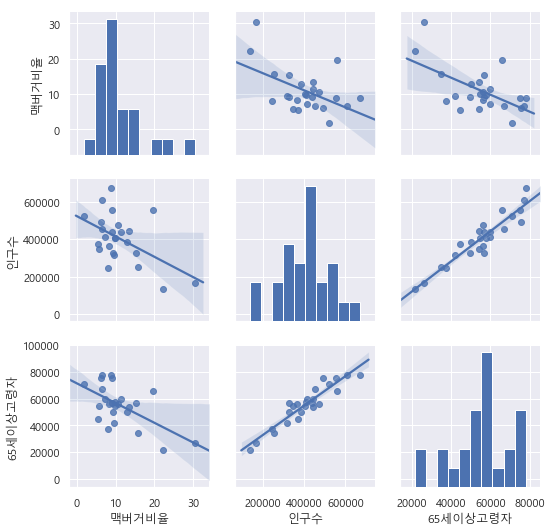

In [51]:
sns.pairplot(population, vars=["맥버거비율", "인구수", "65세이상고령자"], kind="reg");



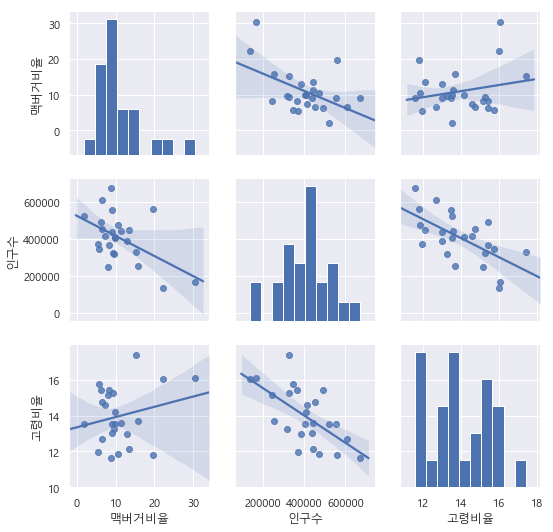

In [52]:
sns.pairplot(population, vars=["맥버거비율", "인구수", "고령비율"], kind="reg");

# 고령비율은 맥버거비율과 크게 관련 없음

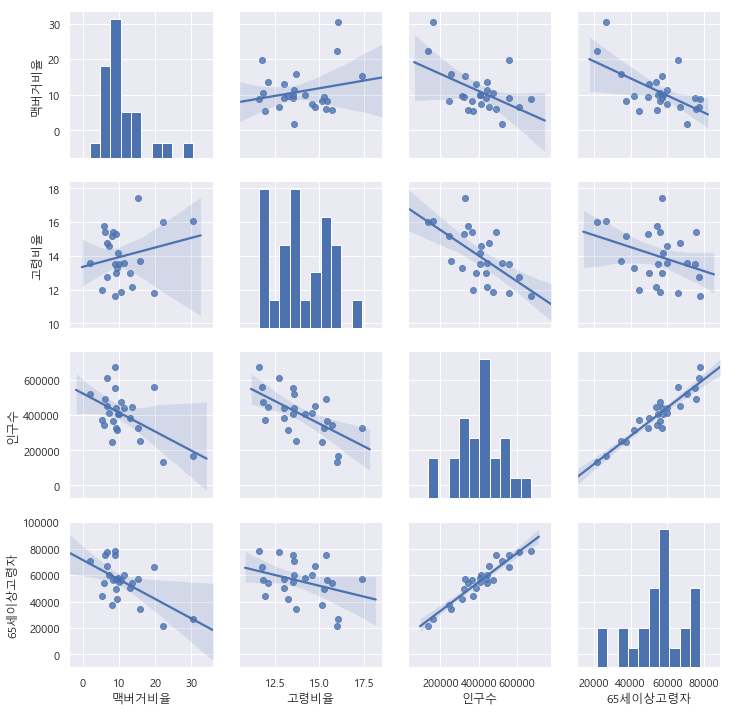

In [53]:
sns.pairplot(population, vars=["맥버거비율", "고령비율", "인구수", "65세이상고령자"], kind="reg");

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: F034-C999

 C:\Users\user\Anaconda_src 디렉터리

2018-10-19  오후 01:23    <DIR>          .
2018-10-19  오후 01:23    <DIR>          ..
2018-10-19  오후 12:51    <DIR>          .ipynb_checkpoints
2018-10-19  오후 12:51           519,483 BS4 & Web Crawling.ipynb
2018-10-19  오후 01:21    <DIR>          data
2018-10-18  오후 02:24           284,449 Data_Portal_노화빌딩.ipynb
2018-10-18  오후 03:04           327,244 Data_Portal_범죄발생.ipynb
2018-10-17  오전 10:22             8,089 FileIO.ipynb
2018-10-17  오후 02:08             7,181 JSON.ipynb
2018-10-18  오전 11:21           836,711 matplotlib.ipynb
2018-10-17  오후 05:33            10,369 MFR.ipynb
2018-10-17  오후 01:31            27,198 NumPy.ipynb
2018-10-17  오후 03:40            51,547 Pandas.ipynb
2018-10-17  오후 06:32             1,998 reduce, 김준회.ipynb
2018-10-18  오후 05:36            14,452 RegEx_정규표현식.ipynb
2018-10-18  오후 04:38           452,433 seoul_pop_지도.ipynb
2018-10-17  오전 09:34             1,950 test.ipynb
2018-10-18  오후 01:

In [65]:
a = []
for eachAddress in addMCDolder:
    prt = eachAddress.split()[1]
    a.append(prt)
a

['서대문구']

In [66]:
guNameMCD = [eachAddress.split()[1] for eachAddress in addMCDolder]
# list comprehension; 파이썬의 기능
# 리스트 안에 함수를 쓸 경우 자동으로 list 만들어줌
guNameMCD

['송파구',
 '금천구',
 '금천구',
 '강남구',
 '강남구',
 '강남구',
 '강동구',
 '구로구',
 '마포구',
 '노원구',
 '구로구',
 '구로구',
 '은평구',
 '광진구',
 '강동구',
 '동작구',
 '종로구',
 '강서구',
 '금천구',
 '마포구',
 '중구',
 '중구',
 '서대문구',
 '양천구',
 '강북구',
 '강북구',
 '강북구',
 '서초구',
 '도봉구',
 '영등포구',
 '성북구',
 '강남구',
 '노원구',
 '강동구',
 '서초구',
 '종로구',
 '강동구',
 '강북구',
 '마포구',
 '중구',
 '금천구',
 '용산구',
 '서초구',
 '서초구',
 '송파구',
 '강남구',
 '종로구',
 '노원구',
 '강서구',
 '송파구',
 '강북구',
 '동작구',
 '중랑구',
 '구로구',
 '구로구',
 '관악구',
 '강남구',
 '양천구',
 '양천구',
 '송파구',
 '도봉구',
 '종로구',
 '성북구',
 '강남구',
 '서초구',
 '서초구',
 '양천구',
 '영등포구',
 '광진구',
 '영등포구',
 '서대문구',
 '은평구',
 '강서구',
 '영등포구',
 '성동구',
 '강서구',
 '송파구',
 '중랑구',
 '성동구',
 '은평구',
 '동작구',
 '용산구',
 '송파구',
 '동대문구',
 '동대문구',
 '종로구',
 '성북구',
 '노원구',
 '노원구',
 '중랑구',
 '동작구',
 '강남구',
 '강남구',
 '양천구',
 '강남구',
 '동대문구',
 '성동구',
 '강남구',
 '마포구',
 '마포구',
 '서대문구']